In [2]:
import pandas as pd 

check4=pd.read_csv(r'cleaned_data2.csv')


📊 Random Forest Regression Model Performance:
🔹 Train R² Score: 0.9940 | Test R² Score: 0.9940
🔹 Train MSE: 0.0060 | Test MSE: 0.0060
🔹 Train RMSE: 0.0773 | Test RMSE: 0.0775
🔹 Train MAE: 0.0470 | Test MAE: 0.0472


C:\Users\DELL\AppData\Local\Temp\ipykernel_23380\1367351724.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette="viridis")


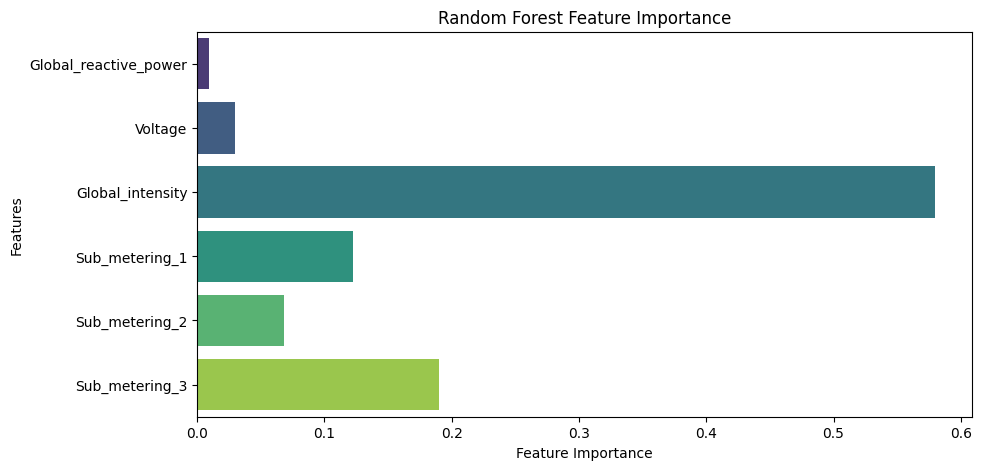

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


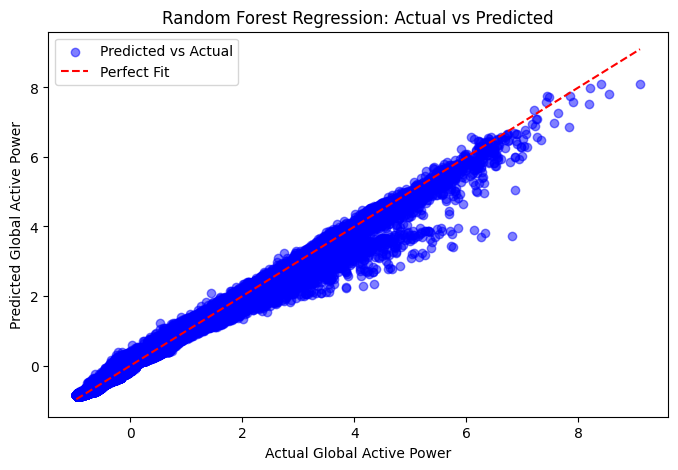

In [3]:
# ✅ Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ✅ Load Data (Assuming `check4` is your preprocessed DataFrame)
X = check4.drop(columns=["Global_active_power"])  # Features
y = check4["Global_active_power"]  # Target Variable

# ✅ Split Data into Training and Testing Sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Train Optimized Random Forest Regression Model
rf_model = RandomForestRegressor(
    n_estimators=50,         # Reduce trees
    max_depth=10,            # Limit depth
    max_features="sqrt",     # Limit features per split
    n_jobs=-1,               # Use all CPU cores
    random_state=42
)
rf_model.fit(X_train, y_train)

# 🔹 Predict on Training and Testing Data
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# 🔹 Evaluate Model Performance
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# ✅ Print Model Evaluation Metrics
print("\n📊 Random Forest Regression Model Performance:")
print(f"🔹 Train R² Score: {train_r2:.4f} | Test R² Score: {test_r2:.4f}")
print(f"🔹 Train MSE: {train_mse:.4f} | Test MSE: {test_mse:.4f}")
print(f"🔹 Train RMSE: {train_rmse:.4f} | Test RMSE: {test_rmse:.4f}")
print(f"🔹 Train MAE: {train_mae:.4f} | Test MAE: {test_mae:.4f}")

# ✅ Feature Importance Visualization
feature_importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=features, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.show()

# ✅ Visualization: Actual vs Predicted (Test Data)
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_test_pred, alpha=0.5, color="blue", label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="dashed", label="Perfect Fit")
plt.xlabel("Actual Global Active Power")
plt.ylabel("Predicted Global Active Power")
plt.title("Random Forest Regression: Actual vs Predicted")
plt.legend()
plt.show()
